# SARKINKofa Test


In [1]:
import time

import cv2
from cv2.typing import MatLike
# from PIL import Image
from IPython.display import display, Image
# import matplotlib.pyplot as plt

from sarkinkofa import SARKINkofa
from sarkinkofa.tools import SarkiANPD, SarkiANPR
from sarkinkofa.types import SarkiDetection, SarkiResult


In [2]:
sarki_kofa = SARKINkofa()
sarki_anpd = SarkiANPD()
sarki_anpr = SarkiANPR()

read time: 0.06867


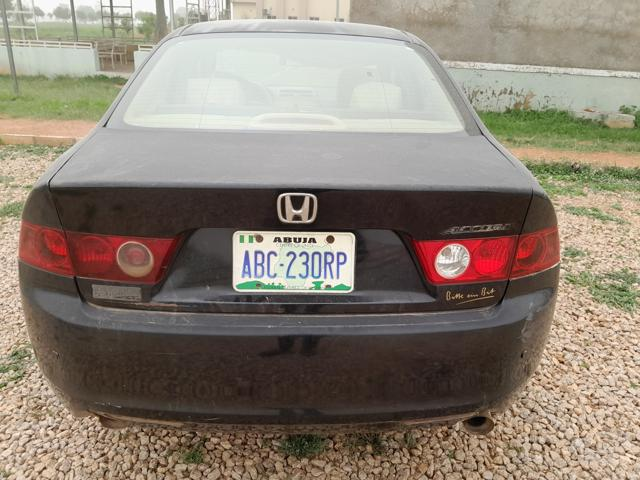

In [8]:
start: float = time.time()
image: MatLike = cv2.imread("../assets/vehicle2.jpg")

# convert to rgb
_image: MatLike = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
stop: float = time.time() - start
print(f"read time: {stop:.5f}")

display(Image.fromarray(_image))


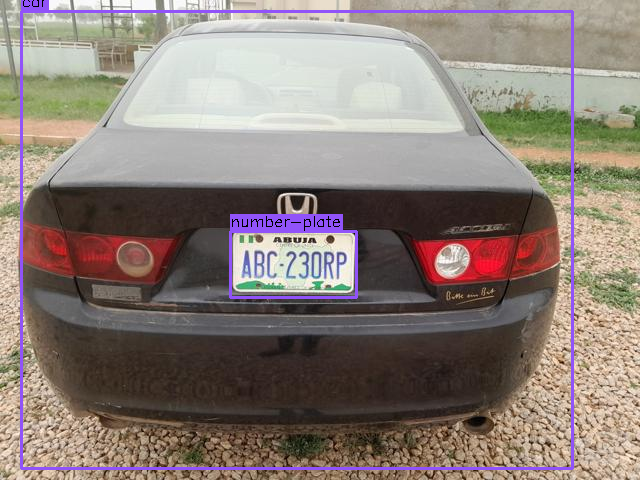

{
    "boxes": [
        [
            21,
            11,
            572,
            468
        ],
        [
            230,
            231,
            356,
            297
        ]
    ],
    "confs": [
        0.9296882152557373,
        0.9543074369430542
    ],
    "cls": [
        1,
        3
    ],
    "labels": [
        "car",
        "number-plate"
    ]
}


In [9]:
sarki_anpd_out: SarkiResult | None = sarki_anpd.detect(
    _image.copy(), conf_thresh=0.5, iou_thresh=0.5, render=True
)

if sarki_anpd_out:
    display(Image.fromarray(sarki_anpd_out.img))

    print(sarki_anpd_out.model_dump_json(indent=4, exclude={"img": True}))


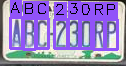

{
    "boxes": [
        [
            10,
            17,
            22,
            48
        ],
        [
            23,
            18,
            35,
            49
        ],
        [
            36,
            18,
            48,
            48
        ],
        [
            54,
            19,
            67,
            48
        ],
        [
            68,
            18,
            79,
            48
        ],
        [
            80,
            19,
            91,
            48
        ],
        [
            93,
            19,
            104,
            49
        ],
        [
            105,
            19,
            117,
            49
        ]
    ],
    "confs": [
        0.11362382769584656,
        0.22615614533424377,
        0.9135652780532837,
        0.14194437861442566,
        0.9247660636901855,
        0.8353670835494995,
        0.9301823973655701,
        0.877159595489502
    ],
    "cls": [
        10,
        11,
        12,
      

In [10]:
if sarki_anpd_out:
    x1, y1, x2, y2 = sarki_anpd_out.boxes[1]
    sarki_anpr_out: SarkiResult | None = sarki_anpr.detect(
        _image[y1:y2, x1:x2].copy(), conf_thresh=0.1, iou_thresh=0.5, render=True
    )

    if sarki_anpr_out:
        display(Image.fromarray(sarki_anpr_out.img))

        print(sarki_anpr_out.model_dump_json(indent=4, exclude={"img": True}))


read time: 0.51478


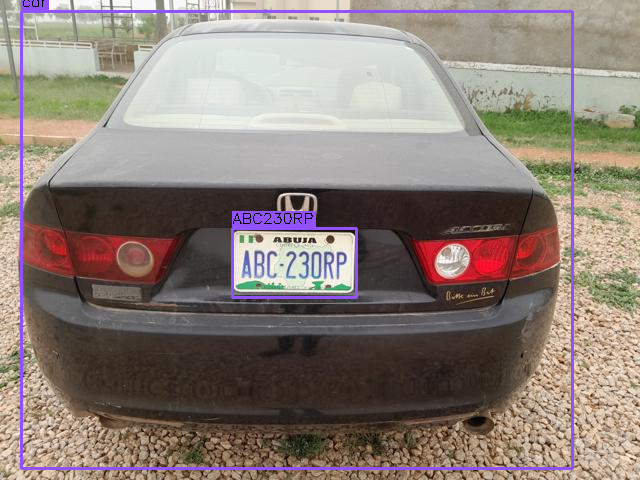

{
    "vehicles": [
        {
            "box": [
                21,
                11,
                572,
                468
            ],
            "conf": 0.9296882152557373,
            "label": "car",
            "plates": [
                {
                    "box": [
                        211,
                        217,
                        335,
                        286
                    ],
                    "conf": 0.8550354242324829,
                    "number": "ABC230RP"
                }
            ]
        }
    ]
}


In [11]:
start: float = time.time()
sarki_kofa_out: SarkiDetection | None = sarki_kofa.detect(
    _image.copy(), det_conf=0.5, det_iou=0.5, read_conf=0.1, read_iou=0.5, render=True
)
stop: float = time.time() - start
print(f"read time: {stop:.5f}")

if sarki_kofa_out:
    display(Image.fromarray(sarki_kofa_out.img))

    if sarki_kofa_out.vehicles:
        print(sarki_kofa_out.model_dump_json(indent=4, exclude={"img": True}))